In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Simulate data for 100,000 patients
np.random.seed(42)
n_patients = 100000
contamination = np.random.choice(['Alta', 'Baja'], size=n_patients, p=[0.10, 0.90])
smoker = np.random.choice(['Sí', 'No'], size=n_patients, p=[0.30, 0.70])
cancer = np.zeros(n_patients)

In [3]:
# Assign probabilities based on contamination and smoker status
for i in range(n_patients):
    if contamination[i] == 'Alta' and smoker[i] == 'Sí':
        cancer[i] = np.random.choice([1, 0], p=[0.05, 0.95])
    elif contamination[i] == 'Alta' and smoker[i] == 'No':
        cancer[i] = np.random.choice([1, 0], p=[0.02, 0.98])
    elif contamination[i] == 'Baja' and smoker[i] == 'Sí':
        cancer[i] = np.random.choice([1, 0], p=[0.03, 0.97])
    else:
        cancer[i] = np.random.choice([1, 0], p=[0.001, 0.999])

In [4]:
# Create a DataFrame
data = pd.DataFrame({'Contaminación': contamination, 'Fumador': smoker, 'Cáncer': cancer})

In [5]:
# Calculate conditional probabilities
prob_cancer = data.groupby(['Contaminación', 'Fumador'])['Cáncer'].mean().reset_index()

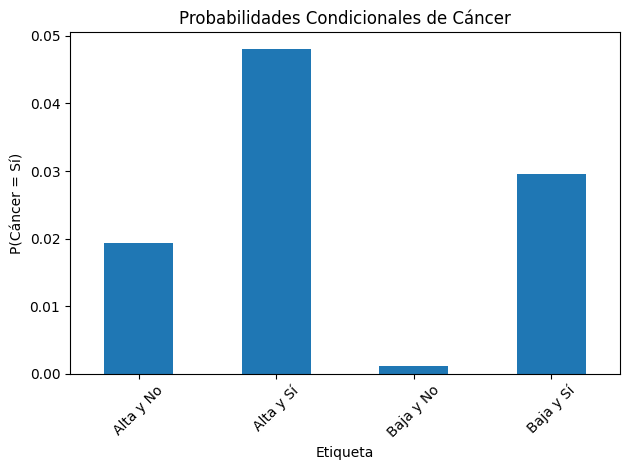

In [6]:
# Combine 'Contaminación' and 'Fumador' into a single label for the x-axis
prob_cancer['Etiqueta'] = prob_cancer['Contaminación'] + ' y ' + prob_cancer['Fumador']

# Plot the probabilities
fig, ax = plt.subplots()
prob_cancer.plot(kind='bar', x='Etiqueta', y='Cáncer', ax=ax, legend=False)
ax.set_ylabel('P(Cáncer = Sí)')
ax.set_title('Probabilidades Condicionales de Cáncer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('probabilidades_condicionales_cancer.png') 
plt.show()